# Unsupervised learning: Clustering

### imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster,metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA


### Data Manip

                    calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Babybel                  314   238.0    209.8     25.1     63.7      6.4   
Beaufort                 401   112.0    259.4     33.3     54.9      1.2   
Bleu                     342   336.0    211.1     28.9     37.1     27.5   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Cantal                   367   256.0    264.0     28.8     48.8      5.7   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Comte                    399    92.0    220.5     32.4     55.9      1.3   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Edam        

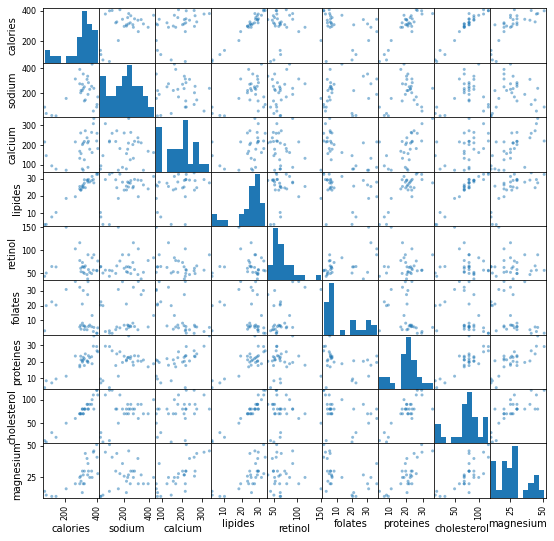

'\n    analyze data (correlation)\n    extreme observations\n'

In [2]:
fromage=pd.read_table(r"C:\Users\hamza\Desktop\Projects\Data-mining\unsupervised_learning_Clustering\fromage1.txt",sep="\t",header=0,index_col=0)

print(fromage)
print(fromage.describe())
    
"""
    crossing variables (2-2)
"""
pd.plotting.scatter_matrix(fromage, figsize=(9,9))
plt.show()

"""
    analyze data (correlation)
    extreme observations
"""

### K-means

In [3]:
np.random.seed(0)                                # to give the same result (fix the way of choosing random variable)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)

"""
    split on clusters
"""
idk = np.argsort(kmeans.labels_)

"""
    show clusters
"""
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))

"""
    average distance from each instance to each group
"""
print(kmeans.transform(fromage))

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

#### silouhette

[0.50681355 0.37299771 0.3282387  0.35737616 0.32267618 0.28114392
 0.29450378 0.23904343 0.25006247]


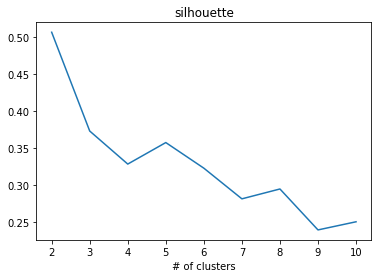

In [4]:

"""
    using "silhouette" metric
"""
res = np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage,km.labels_)
print (res)
"""
    graphic
"""
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show()

### CAH

[[ 16.          20.          33.64119498   2.        ]
 [ 17.          18.          37.47452468   2.        ]
 [  1.          23.          38.02841043   2.        ]
 [  2.           9.          45.00877692   2.        ]
 [ 21.          26.          49.66356814   2.        ]
 [  3.          30.          58.4642911    3.        ]
 [ 11.          27.          59.83895053   2.        ]
 [  6.          10.          61.06209954   2.        ]
 [ 22.          31.          70.17045912   3.        ]
 [ 25.          35.          80.84746955   3.        ]
 [  5.          19.          87.48159806   2.        ]
 [ 15.          28.          88.28833445   2.        ]
 [  7.          33.          90.54197921   3.        ]
 [ 14.          24.          94.70348462   2.        ]
 [ 12.          32.          96.77015725   3.        ]
 [ 37.          41.         112.88916393   6.        ]
 [  4.          34.         127.57537641   4.        ]
 [  0.          42.         135.11430963   3.        ]
 [  8.    

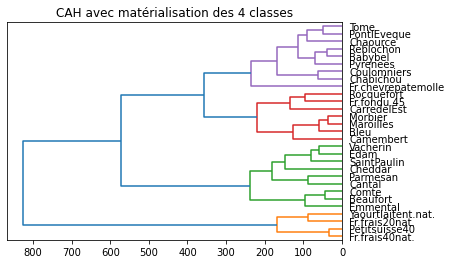

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle
             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Mo

In [5]:
Z = linkage(fromage,method='ward', metric='euclidean')

print(Z)
"""
    Showing the dendrogram
"""
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()

"""
    t is the limit of distance between instances in the same cluster
"""
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
"""
    sorted index of groupes
"""
idg = np.argsort(groupes_cah)
"""
    Show observations and their respective groups
"""
print(pd.DataFrame(fromage.index[idg],groupes_cah[idg]))

"""
    AgglomerativeClustering
"""
clustering = AgglomerativeClustering(n_clusters=4).fit(fromage)
ida = np.argsort(clustering.labels_)

print(pd.DataFrame(fromage.index[ida],clustering.labels_[ida]))


### CAH vs K_means

In [6]:

"""
    row is cah and column is kmeans and the matrice is the number of shared instances.
"""
print(pd.crosstab(groupes_cah,kmeans.labels_))



col_0  0  1  2  3
row_0            
1      0  0  4  0
2      0  8  0  1
3      1  0  0  6
4      6  0  0  3


### CAH vs CAH AgglomerativeClustering

In [7]:
print(pd.crosstab(groupes_cah,clustering.labels_))

col_0  0  1  2  3
row_0            
1      0  0  0  4
2      9  0  0  0
3      0  7  0  0
4      0  0  9  0


### Kmeans vs CAH AgglomerativeClustering

In [8]:
print(pd.crosstab(kmeans.labels_,clustering.labels_))

col_0  0  1  2  3
row_0            
0      0  1  6  0
1      8  0  0  0
2      0  0  0  4
3      1  6  3  0


### Analyse en composantes principales (ACP)

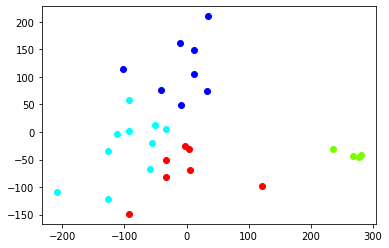

In [9]:
"""
    Divide on 2 componants, reduction from 9 to 2 variables (depends on correlation)
    Number of clusters is 4
    (if number of components is 3 => 3D graphic is needed)
"""
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

### DIANA (DIvisiveANAlysing)

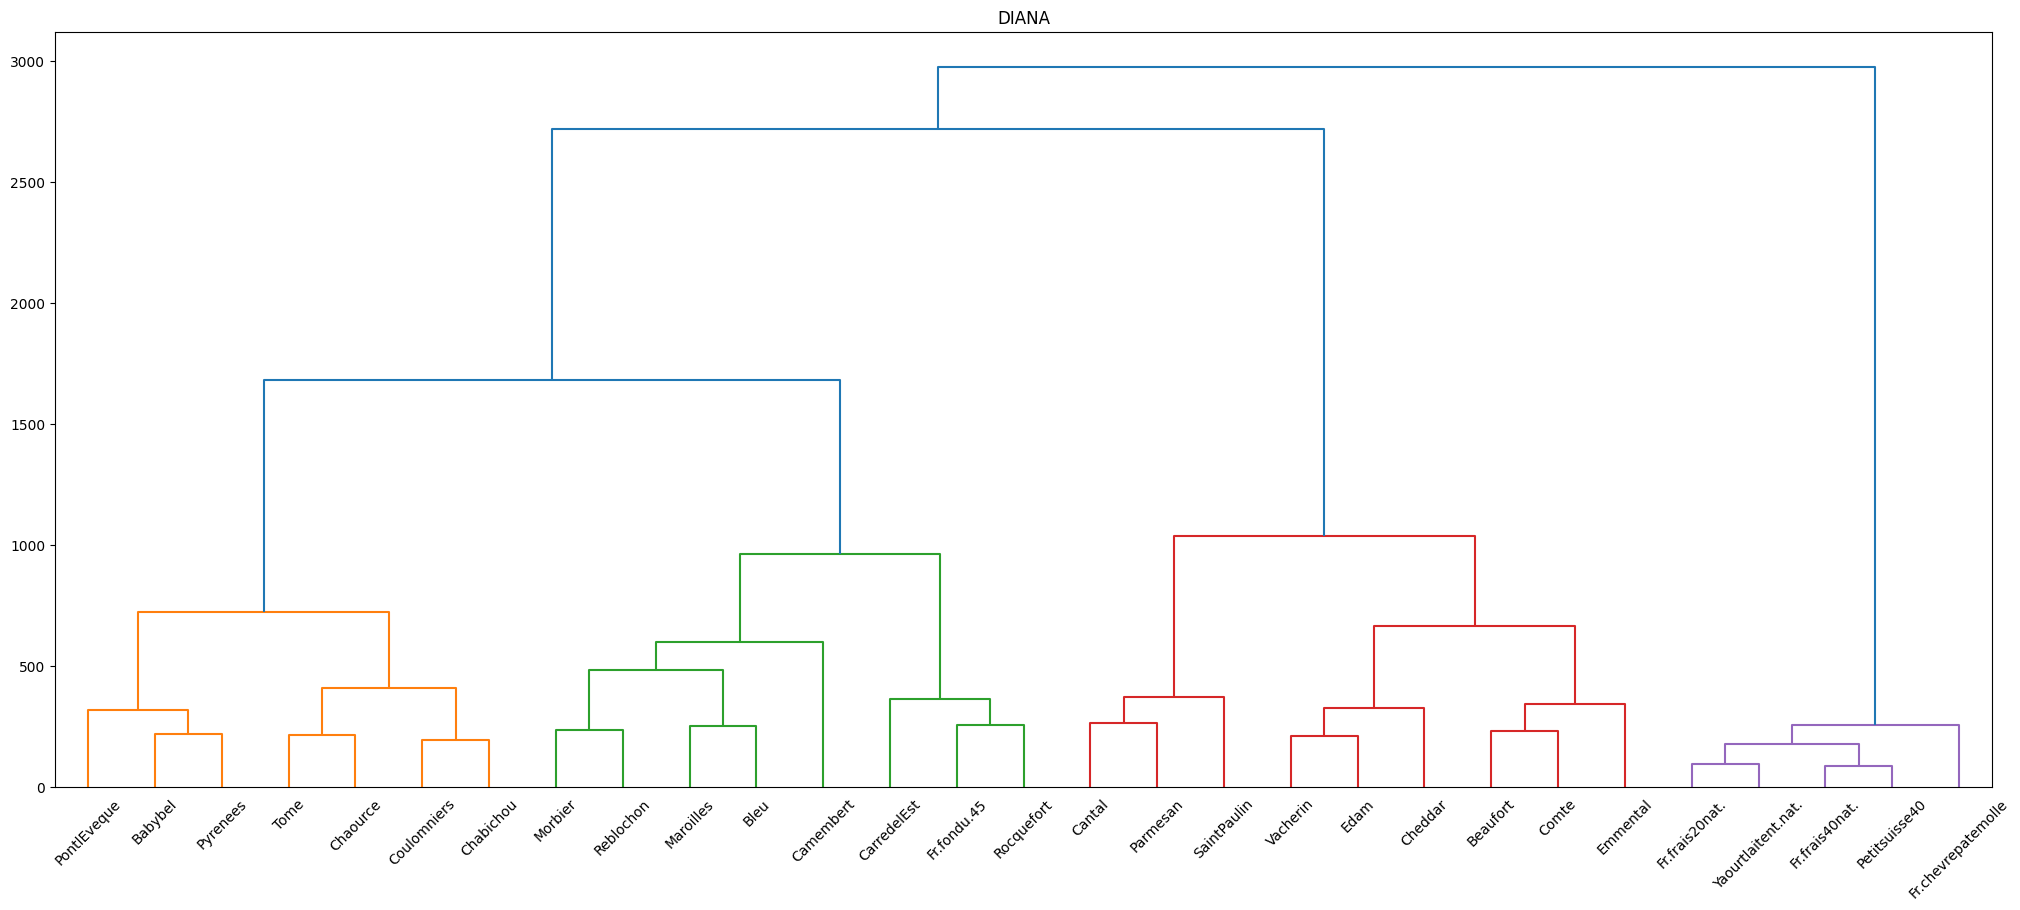

In [10]:
"""
we need this function to calculate the distance between 2 elements
so if we already calculate the mean value we get it from the Z matrix
or we calculate it : sum(fromage.iloc[i])/9
"""
def distance(i):
    if i >= len(fromage):
        return Z[i - len(fromage)][2]
    else:
        return sum(fromage.iloc[i])/9

"""
the length of cluster 
we need it for the linkage matrix
"""
def cluster_len(i):
    if i >= len(fromage):
        return Z[i - len(fromage)][3]
    else:
        return 1

"""
we apply kmeans on our dataset then we split it into 2 clusters a0 and a1 
"""
def kmeans_split(c):
    np.random.seed(0)
    kmeans = cluster.KMeans(n_clusters=2)
    kmeans.fit(c)

    idk = np.argsort(kmeans.labels_)
    idk0 = []
    idk1 = []

    k = 0
    for i in kmeans.labels_[idk]:
        if i == 0:
            idk0.append(idk[k])
            k = k + 1
        else:
            idk1.append(idk[k])
            k = k + 1

    a0 = pd.DataFrame(c.values[idk0], c.index[idk0])
    a1 = pd.DataFrame(c.values[idk1], c.index[idk1])
    return a0, a1

"""
The idea is to apply kmeans on the whole dataset 
we get 2 clusters and in each cluster w re-apply kmeans recursively until we get a cluster of one element
in everytime we have to to put the linkage data in Z matrix in order to generate the dendrogram

"""
def diana(c):
    if len(c) < 2:
        ind = np.argwhere(fromage.index == c.index[0])
        return ind[0][0]
    a0, a1 = kmeans_split(c)
    clusters.append(a0)
    clusters.append(a1)
    index1 = diana(a0)
    index2 = diana(a1)
    Z.append([
        index1,
        index2,
        distance(index1) + distance(index2),
        cluster_len(index1) + cluster_len(index2)
    ])

    return len(Z) - 1 + len(fromage)

Z = []
clusters = []
index = diana(fromage)

fig = plt.figure(figsize=(25, 10), dpi=100)
plt.title('DIANA')
dn = dendrogram(Z, labels=fromage.index, orientation='top', color_threshold=1500)
plt.show()
